## Simple Linear Regression Ex 3: Car Price Data

In this exercise we will use a larger dataset that has both more datapoints and more independent variables. The dataset contains data on various car models and here we want to predict the car price from its features. We will only use one of these variables for now and will come back to use more variables in the next chapter where we look at multiple linear regression. We will also split our data into a training set and test set so we can apply our model to unseen data. 

First we import our required packages and dataset into the notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import statsmodels.api as stats
import numpy as np

In [2]:
carprice_df = pd.read_csv(r'C:\Users\user\OneDrive\Documents\Data Science\Student Files - Regression\1 - Simple Linear Regression\CarPrice_Assignment.csv')

### Assessing the Data

In [3]:
carprice_df.shape

(205, 26)

In [4]:
carprice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We can see that here we have 26 columns and 205 observations in this dataset. Our target variable here is the price column. For now we will only use the enginesize column as our independent variable. 

### Test/Train Split

We will train our model on 70% of the data and test its results on the remaining 30%. The [df.sample()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) method takes a random sample of the dataframe with size specified by frac aragument. We can then get our test set as the remaining rows not in this random sample. 

In [6]:
train_df = carprice_df.sample(frac=0.7, random_state=99) #random state is a seed value
test_df = carprice_df.drop(train_df.index)

In [7]:
train_df.shape

(144, 26)

In [8]:
test_df.shape

(61, 26)

We now have 144 observations in our training sample and the remaining 61 in our test set. We now continue as we did in the previous examples.

### Visualising the Data

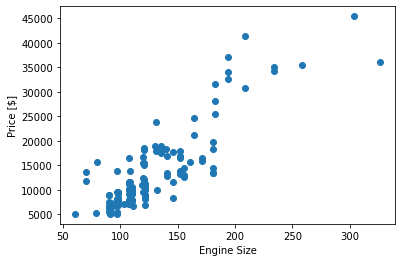

In [8]:
plot.scatter(train_df.enginesize, train_df.price)
plot.xlabel('Engine Size')
plot.ylabel('Price [$]')
plot.show()

### Fitting the Linear Regression Model

In [9]:
Y_train = train_df.price
X_train = stats.add_constant(train_df.enginesize)

In [10]:
model_carprice = stats.OLS(Y_train, X_train)
results_carprice = model_carprice.fit()

In [11]:
print(results_carprice.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     431.6
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           6.87e-45
Time:                        16:46:36   Log-Likelihood:                -1399.1
No. Observations:                 144   AIC:                             2802.
Df Residuals:                     142   BIC:                             2808.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7969.4448   1068.536     -7.458      0.0

In [12]:
intercept_carprice = results_carprice.params[0]
engsize_coeff = results_carprice.params[1]
ssr_carprice = results_carprice.ssr

print('The intercept value is {:.3f}'.format(intercept_carprice))
print('The coefficient (slope) for the years of experience independent variable is {:.3f}'.format(engsize_coeff))
print('The sum of square residuals is {:.1f}'.format(ssr_carprice))

The intercept value is -7969.445
The coefficient (slope) for the years of experience independent variable is 167.600
The sum of square residuals is 2319259109.3


### Plotting Results

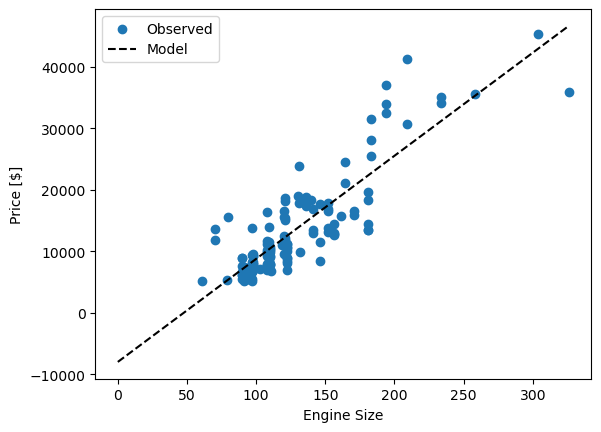

In [14]:
x_synthetic = np.linspace(0,train_df.enginesize.max(), 50)
y_pred_carprice = engsize_coeff*x_synthetic + intercept_carprice
plot.scatter(train_df.enginesize, train_df.price, label='Observed')
plot.plot(x_synthetic, y_pred_carprice, color='k', ls='--', label='Model')
plot.xlabel('Engine Size')
plot.ylabel('Price [$]')
plot.legend()
plot.show()

We can see that our model does a reasonable job at explaining the variation in car prices. But can we add in more independent variables to further explain the errors between our predictions and the observed values? We will explore this in the next chapter on multiple linear regression.

### Applying the Model to Test Data

We can then apply our model to the test data and use it to make predictions for the test data that wasn't used to build the model. We can compare these predictions with the actual observed values. We can use the results.predict() method to predict for the test data. Like with the training data, we first split the target and indpendent variable and add a constant column to the indpendent variable.

In [14]:
Y_test = test_df.price
X_test = stats.add_constant(test_df.enginesize)

In [15]:
test_predictions = results_carprice.predict(X_test)

We can plot our predictions against the observed values to see how good our predictions are. The closer to the diagonal line where predictions equal observed the better. 

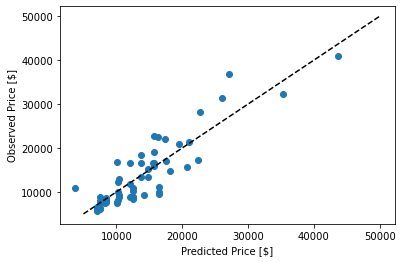

In [16]:
plot.scatter(test_predictions, Y_test)
plot.plot([5000, 50000], [5000, 50000], c='k', ls='--')
plot.xlabel('Predicted Price [$]')
plot.ylabel('Observed Price [$]')
plot.show()

We can see that our predictions are reasonably close to the actual values despite the model not being built on this data. We will come back to the metrics we can use to quantitively evaluate our models in chapter 4. 

## Scikit-Learn 

Like in the last exercise, we will also repeat this using the Scikit-learn package. 

Scikit-learn also contains a useful function that performs our test-train split for us. The random sampling used by this function will be different to the one used before with the .sample() method so our training set here will contain different rows to the one used with statsmodels.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Test/Train Split

We pass the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function both our independent variable and target variable and set the size of our test set using the test_size argument. It will then return our data split into four sets: the independent variable training data; the independent variable test data; the target variable training data and the the target variable test data.

In [18]:
Y = carprice_df.price
X = carprice_df.enginesize

In [19]:
sk_X_train, sk_X_test, sk_Y_train, sk_Y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

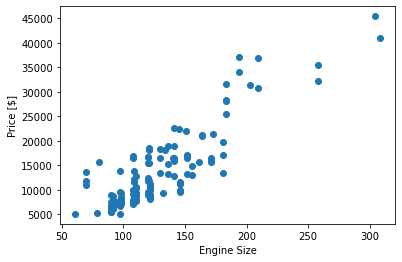

In [20]:
plot.scatter(sk_X_train, sk_Y_train)
plot.xlabel('Engine Size')
plot.ylabel('Price [$]')
plot.show()

### Fitting the Model to the Training Data

In [21]:
sk_X_train = sk_X_train.values.reshape(-1, 1)
sk_X_test = sk_X_test.values.reshape(-1, 1)

In [22]:
regressor = LinearRegression()  
regressor.fit(sk_X_train, sk_Y_train)

LinearRegression()

In [23]:
sk_intercept_carprice = regressor.intercept_
sk_engsize_coeff = regressor.coef_[0]
sk_ssr_carprice = np.sum((sk_Y_train-regressor.predict(sk_X_train))**2)

In [24]:
print('Using Scikit-learn...')
print('The intercept value is {:.3f}'.format(sk_intercept_carprice))
print('The coefficient (slope) for the engine size variable is {:.3f}'.format(sk_engsize_coeff))
print('The sum of square residuals is {:.1f}'.format(sk_ssr_carprice))

Using Scikit-learn...
The intercept value is -8047.267
The coefficient (slope) for the engine size variable is 169.706
The sum of square residuals is 1986027010.9


As we can see from the results the intercept and slope are similar to the values we got before but are not the same due to the different test/train samples.

### Applying the Model to Test Data

As we saw when calculating the sum of square errors, we can use the .predict() method to make predictions from values of the independent variable. Here we get our test set predictions using the test X values. We can then compare these predictions with our observed test target values Y_test by plotting them against each other.

In [25]:
sk_test_predictions = regressor.predict(sk_X_test)

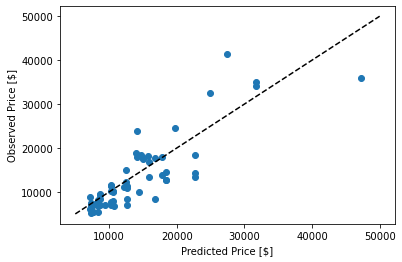

In [26]:
plot.scatter(sk_test_predictions, sk_Y_test)
plot.plot([5000, 50000], [5000, 50000], c='k', ls='--')
plot.xlabel('Predicted Price [$]')
plot.ylabel('Observed Price [$]')
plot.show()

In the next chapter we will extend linear regression so we can use multiple independent variables to predict our target variable.